In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
housing = fetch_openml(name="boston", version=1, as_frame=True)

data = housing.frame
X = data.drop(columns="MEDV")   # Features
y = data["MEDV"]                # Target (house price)

In [3]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [4]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=7
)

In [6]:
regression_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

In [7]:
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', LinearRegression())])

In [8]:
predictions = regression_pipeline.predict(X_test)

In [9]:
rmse_value = np.sqrt(mean_squared_error(y_test, predictions))
r2_value = r2_score(y_test, predictions)

print(f"Root Mean Squared Error: {rmse_value:.2f}")
print(f"R² Score: {r2_value:.2f}")

Root Mean Squared Error: 6.02
R² Score: 0.55


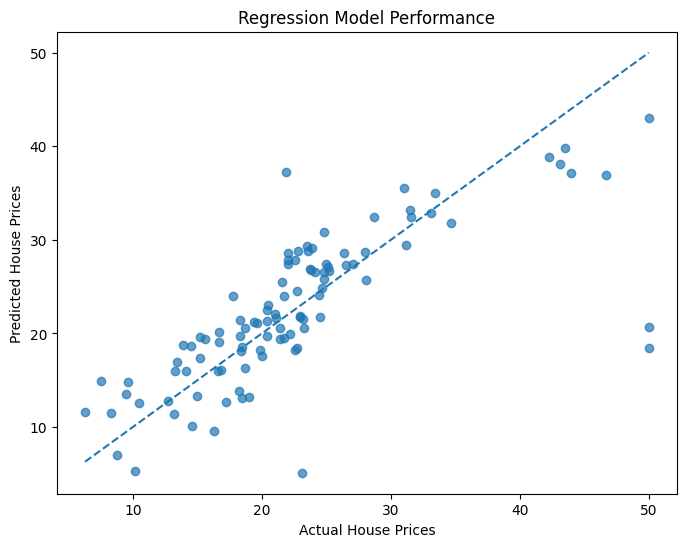

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Regression Model Performance")
plt.show()

In [11]:
feature_names = numeric_features.tolist()

coefficients = regression_pipeline.named_steps["model"].coef_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Impact": coefficients[:len(feature_names)]
}).sort_values(by="Impact", ascending=False)

print(importance_df)

    Feature    Impact
4        RM  3.961482
9         B  0.815621
1        ZN  0.607937
2     INDUS -0.185100
7       TAX -0.201256
5       AGE -0.347812
0      CRIM -0.674321
3       NOX -1.532899
8   PTRATIO -1.855371
10    LSTAT -2.802166
6       DIS -2.849537
